#### Build Simple Workflow using LangGraph

#### State 
 - First, define the State of Graph 
 The State schema serves as the input schema for all nodes and edges in the graph. 
 Let's use the TypedDict class from python typing module as our schema, which provides type hints for the keys.

In [5]:
from typing_extensions import TypedDict 

class State(TypedDict):
    graph_info: str 
    

In [6]:
def start_play(state:State):
    print("Start Play has been called")
    return {"graph_info": state["graph_info"] + "I am planning to play"} 

def cricket(state:State):
    print("Cricket node has been called")
    return {"graph_info": state["graph_info"] + "Cricket"}

def badmintton(state:State):
    print("Badmintton node has been called")
    return {"graph_info": state["graph_info"] + "Badmintton"}


In [7]:
import random 
from typing import Literal 

def random_play(state:State) -> Literal["cricket", "badmintton"]:
    if random.random() > 0.5:
        return "cricket"
    else:
        return "badmintton"
    

In [8]:
from langgraph.graph import StateGraph, START, END 
from langgraph.prebuilt import tools_condition , ToolNode 

##Builod Graph 
graph = StateGraph(State)

#Add nodes 
graph.add_node("start_play", start_play)
graph.add_node("cricket", cricket)
graph.add_node("badmintton", badmintton)

## Schedule the floow of graph 
graph.add_edge(START, "start_play")
graph.add_conditional_edges("start_play", random_play)
graph.add_edge("cricket", END)
graph.add_edge("badmintton", END)

##Compile the graph 
graph_builder = graph.compile()

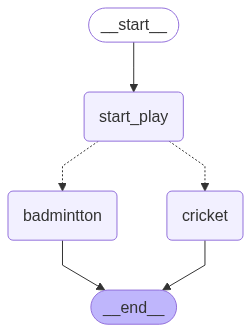

In [9]:
from IPython.display import display, Image 
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [16]:
graph_builder.invoke({"graph_info": "My name is Krish  "})

Start Play has been called
Cricket node has been called


{'graph_info': 'My name is Krish  I am planning to playCricket'}